In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
GaussianMix = GaussianMixture.symmetric_2D(5,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="Diffusion", model=model1)

trainer.train_loop(num_epochs=5000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 75.6939468383789
In Epoch 1000 we have a loss of 4.935706615447998
In Epoch 2000 we have a loss of 6.975806713104248
In Epoch 3000 we have a loss of 14.065346717834473
In Epoch 4000 we have a loss of 8.176368713378906


In [3]:
swiss = SwissRoll2D(device)

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="Diffusion", model=model2)

trainer2.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 8.466343879699707
In Epoch 1000 we have a loss of 5.646525859832764
In Epoch 2000 we have a loss of 5.184269905090332
In Epoch 3000 we have a loss of 6.643925189971924
In Epoch 4000 we have a loss of 5.754899501800537
In Epoch 5000 we have a loss of 5.396633625030518
In Epoch 6000 we have a loss of 4.501410484313965
In Epoch 7000 we have a loss of 3.909477710723877
In Epoch 8000 we have a loss of 5.499698638916016
In Epoch 9000 we have a loss of 8.205866813659668
In Epoch 10000 we have a loss of 5.32139253616333
In Epoch 11000 we have a loss of 25.768579483032227
In Epoch 12000 we have a loss of 5.178321361541748
In Epoch 13000 we have a loss of 8.160051345825195
In Epoch 14000 we have a loss of 7.472475528717041
In Epoch 15000 we have a loss of 6.421639442443848
In Epoch 16000 we have a loss of 12.435457229614258
In Epoch 17000 we have a loss of 6.944933891296387
In Epoch 18000 we have a loss of 15.392207145690918
In Epoch 19000 we have a loss of 13.980635

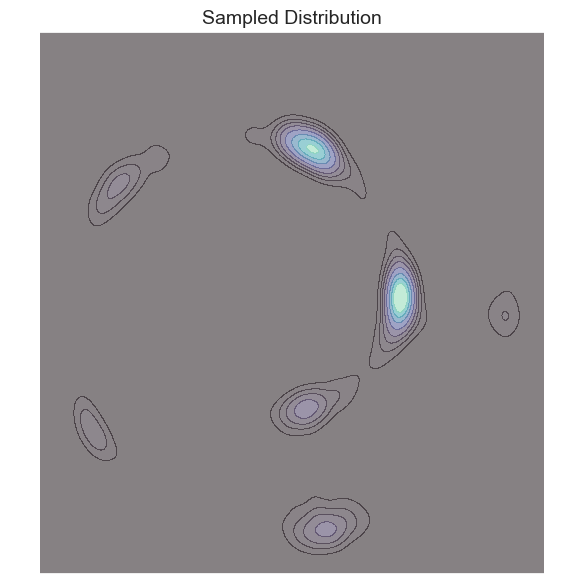

In [ ]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

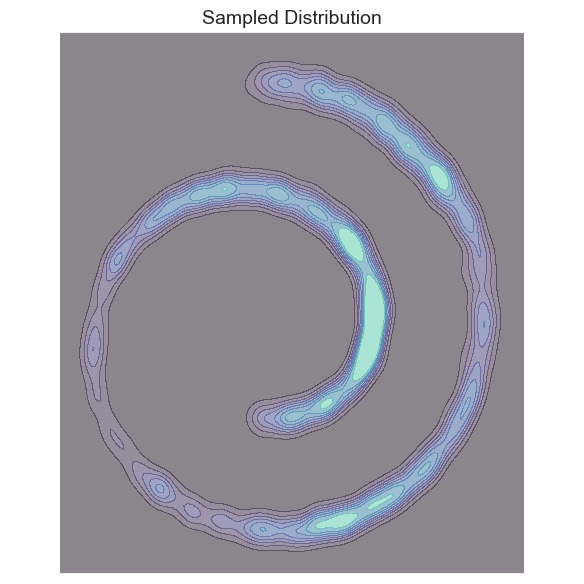

In [5]:
models = [model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

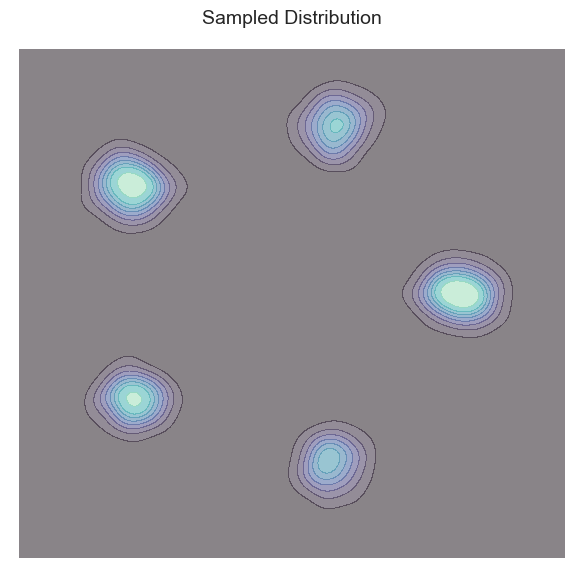

In [ ]:
sde = Langevin_Schedule(model2, alpha = LinearAlpha(),beta=SquareRootBeta(), sigma=1.5)

solver2 = EulerSDESolver(sde)

model_sampler2 = Sampler(solver2)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(model_sampler2.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)